# Directed multi-graph (.gml)

1. Read .gml file
2. Degree histogram
3. Density
4. Degree centrality
5. Closeness centrality
6. Betweenness centrality
7. Degree assortativity coefficient
8. Degree pearson correlation coefficient
9. Clustering coefficient
10. Average node connectivity

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

gml_files = glob('../output/network/*/*.gml')

# read gml file
# graph = nx.read_gml('../data/graph/article1.gml')

In [20]:
print(len(gml_files))
gml_files

50


['../output/network/positive/article2.gml',
 '../output/network/positive/article1804.gml',
 '../output/network/positive/article6247.gml',
 '../output/network/positive/article4150.gml',
 '../output/network/positive/article1105.gml',
 '../output/network/positive/article5077.gml',
 '../output/network/positive/article111.gml',
 '../output/network/positive/article828.gml',
 '../output/network/positive/article665.gml',
 '../output/network/positive/article664.gml',
 '../output/network/positive/article1542.gml',
 '../output/network/positive/article4303.gml',
 '../output/network/positive/article36.gml',
 '../output/network/positive/article4210.gml',
 '../output/network/positive/article620.gml',
 '../output/network/positive/article31.gml',
 '../output/network/positive/article5.gml',
 '../output/network/positive/article29.gml',
 '../output/network/positive/article46.gml',
 '../output/network/positive/article30.gml',
 '../output/network/positive/article609.gml',
 '../output/network/positive/articl

In [22]:
def calculate_graph_inf(graph):
    info = nx.info(graph)
    print info
    # plot spring layout
    plt.figure(figsize=(11,11))
    nx.draw_spring(graph, arrows=True, with_labels=True)


In [23]:
gml_files[0]

'../output/network/positive/article2.gml'

********************************************************************************
../output/network/positive/article2.gml
Name: 
Type: MultiDiGraph
Number of nodes: 28
Number of edges: 23
Average in degree:   0.8214
Average out degree:   0.8214
********************************************************************************
../output/network/positive/article1804.gml
Name: 
Type: MultiDiGraph
Number of nodes: 42
Number of edges: 50
Average in degree:   1.1905
Average out degree:   1.1905
********************************************************************************
../output/network/positive/article6247.gml
Name: 
Type: MultiDiGraph
Number of nodes: 109
Number of edges: 96
Average in degree:   0.8807
Average out degree:   0.8807
********************************************************************************
../output/network/positive/article4150.gml
Name: 
Type: MultiDiGraph
Number of nodes: 24
Number of edges: 18
Average in degree:   0.7500
Average out degree:   0.7500
**************

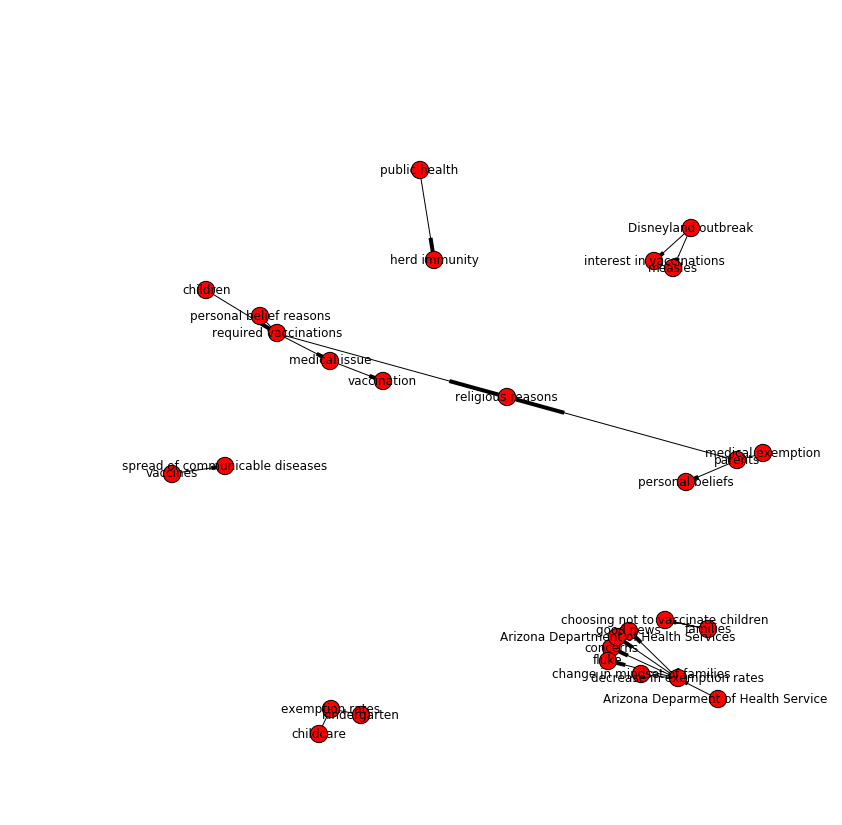

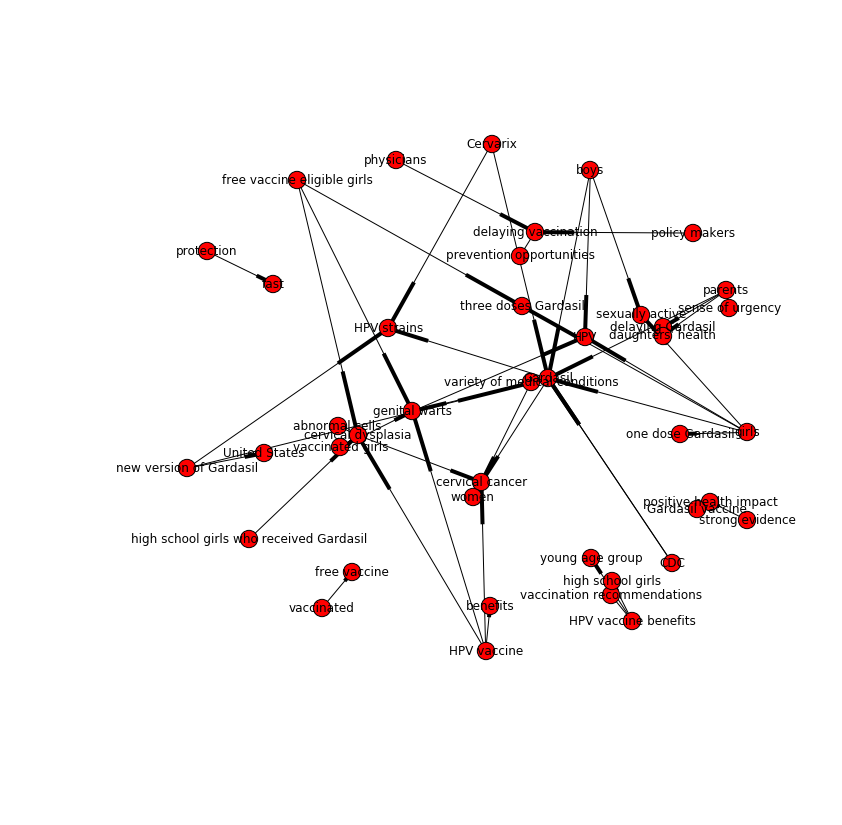

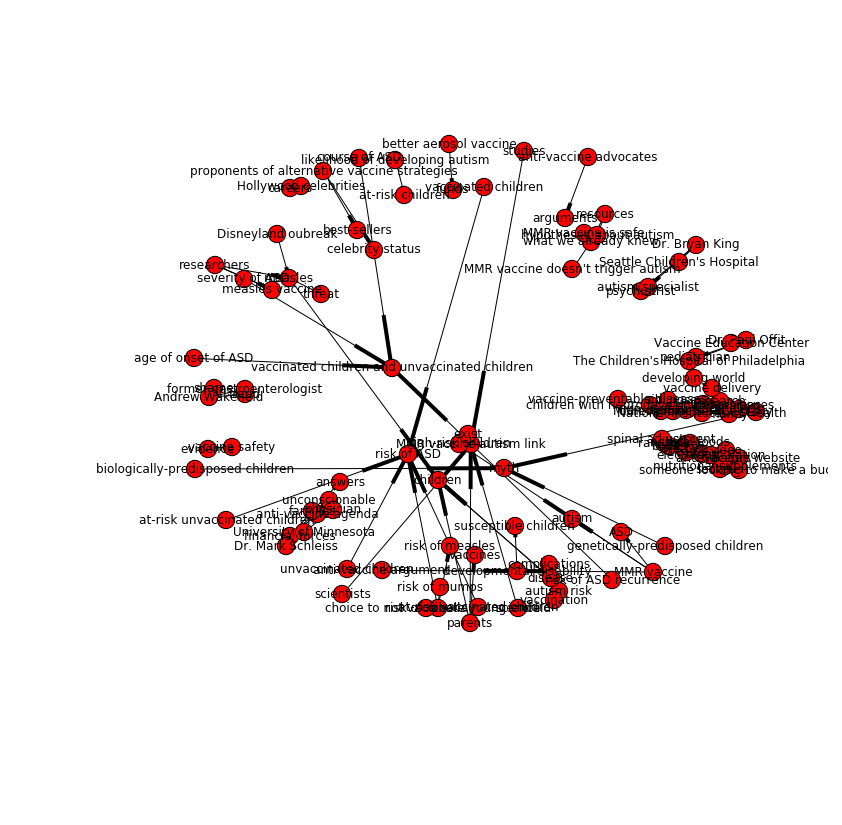

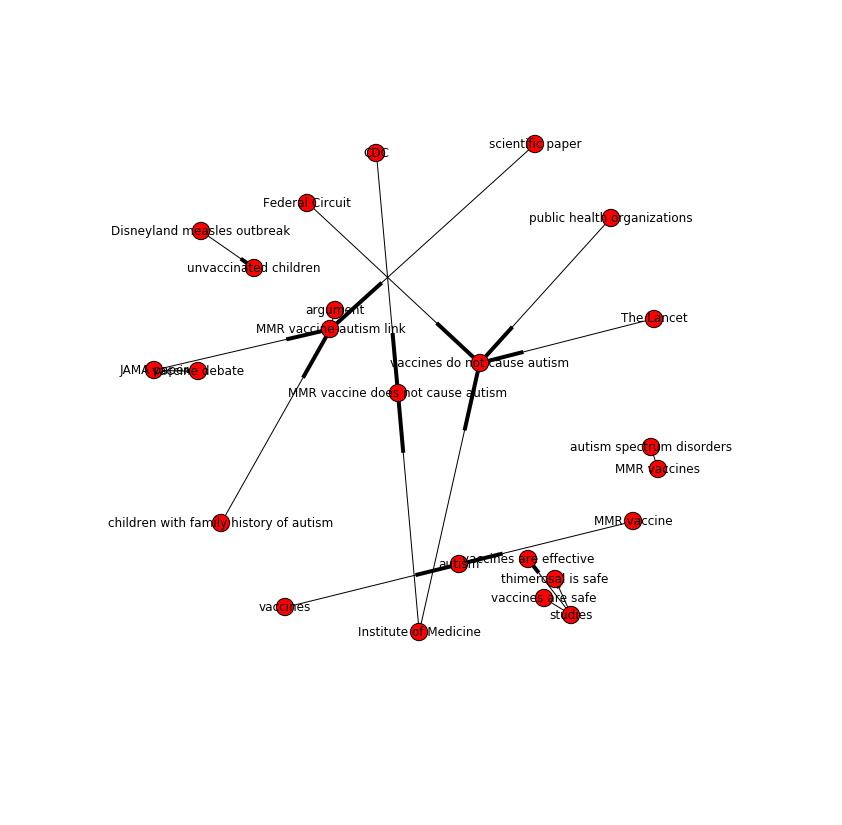

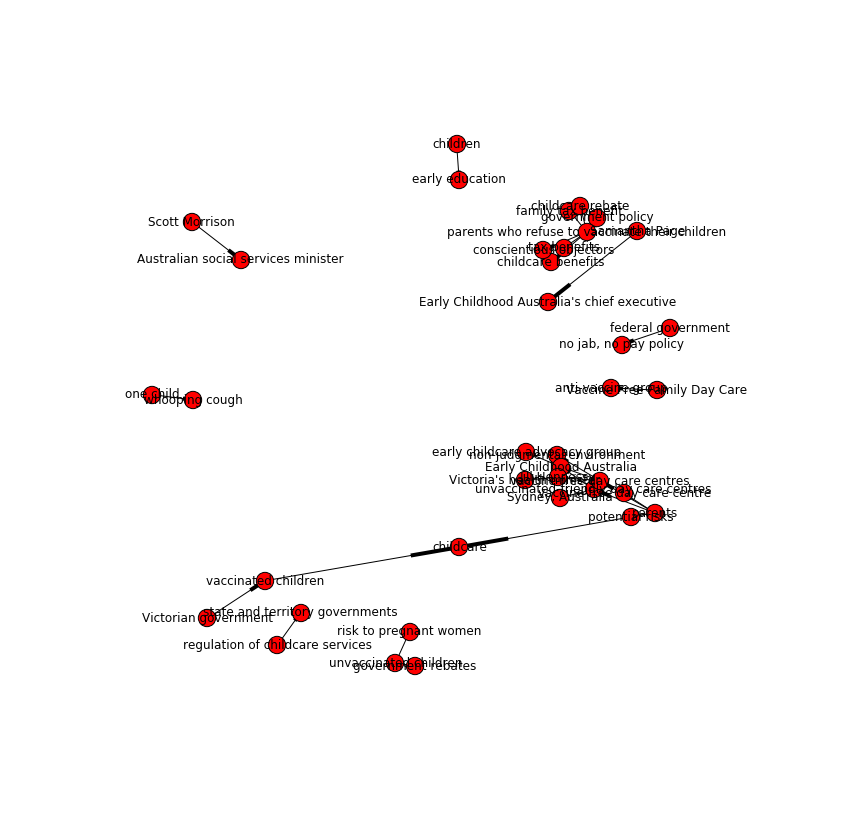

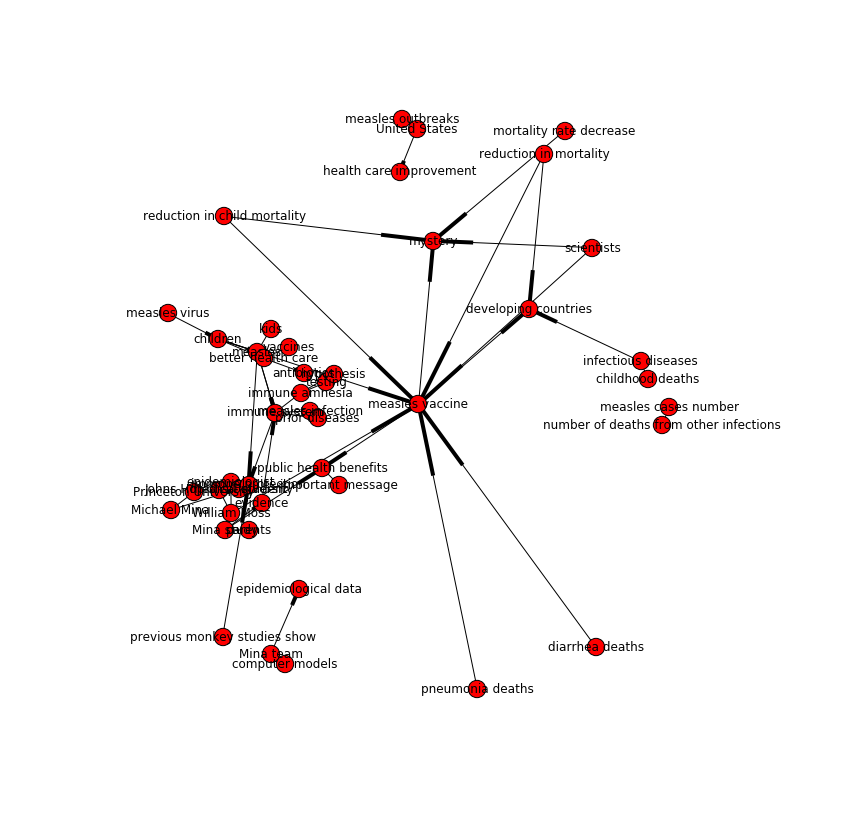

In [24]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    print('*' * 80)
    print(gml_graph)
    calculate_graph_inf(graph)
    if graph_num == 5:
        break

## Degree histogram
- Return a list of the frequency of each degree value
    - Degree values are the index in the list

In [25]:
# returns a list of frequencies of degrees
print ("directed graph ="), nx.degree_histogram(graph)

directed graph = [0, 25, 8, 5, 1, 3, 1, 1, 0, 0, 1]


[0, 25, 8, 5, 1, 3, 1, 1, 0, 0, 1]

## Density
Notes: The density is 0 for a graph without edges and 1 for a complete graph. The density of multigraphs can be higher than 1. Self loops are counted in the total number of edges so graphs with self loops can have density higher than 1.

In [ ]:
print "directed graph =", nx.density(graph)

## Degree centrality
- Degree centrality for a node v is the fraction of nodes it is connected to

In [ ]:
# get all the values of the dictionary, this returns a list of centrality scores
# turn the list into a numpy array
# take the mean of the numpy array

print "Degree centrality (directed) =", nx.degree_centrality(graph).values()


## Closeness centrality
- Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1
- Higher values of closeness indicate higher centrality

In [ ]:
#clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()

print "Closeness centrality (directed) =", nx.closeness_centrality(graph).values()

## Betweenness centrality
- Betweenness centrality of a node v is the sum of the fraction of all pairs shortest paths that pass through v
    - Compute the shortest-path betweenness centrality for nodes

In [ ]:
#nx.betweenness_centrality(graph)
#bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()

#print "Betweenness centrality (directed) =", nx.betweenness_centrality(graph)
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

### Current-flow betweenness centrality
- Current-flow betweenness centrality uses an electrical current model for information spreading in contrast to betweenness centrality which uses shortest paths.
- Current-flow betweenness centrality is also known as random-walk betweenness centrality

In [ ]:
# run for largest component
# graph must be connected
#print nx.current_flow_betweenness_centrality(graph)

## Degree assortativity coefficient

In [ ]:
#deg_ac = nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient (directed) =", nx.degree_assortativity_coefficient(graph)

## Clustering coefficient

In [ ]:
# (cannot be multigraph)
#nx.average_clustering(ugraph)

## Condensation
#nx.condensation(graph)

## Average node connectivity
The average connectivity \bar{\kappa} of a graph G is the average of local node connectivity over all pairs of nodes of G

In [ ]:
#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

#avg_node_con = nx.average_node_connectivity(graph)
print "Average node connectivity (directed) =", nx.average_node_connectivity(graph)

## Closeness vitality
Compute closeness vitality for nodes. Closeness vitality of a node is the change in the sum of distances between all node pairs when excluding that node.

In [ ]:
# example
G = nx.cycle_graph(3)
nx.draw(G)
nx.closeness_vitality(G)

In [ ]:
# figure out how to sort by value
nx.closeness_vitality(graph)

In [ ]:
# intersection_all()
# return a new graph that contains only the edges that exist in all graphs
# all supplied graphs must have the same node set

# Summary

In [ ]:
print info
print "Density ="
print "Degree centrality ="
print "Closeness centrality ="
print "Betweenness centrality ="
print "Degree assortativity coefficient ="
print "Degree pearson correlation coefficient ="
print "Average node connectivity ="
#print "Closeness vitality ="